## Ver3

In [1]:
import pandas as pd
import glob
import logging
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
# Define the CSV file directory
csv_directory = os.path.abspath("../data")

# List of files to merge
selected_files = ["adult21.csv", "adult22.csv", "adult23.csv"] # Years to analyze
# selected_files = glob.glob(os.path.join(csv_directory, "*.csv")) # For all CSV files

# Get full file paths for selected files that exist
csv_files = [os.path.join(csv_directory, f) for f in selected_files if os.path.exists(os.path.join(csv_directory, f))]
logging.info(f"Found {len(csv_files)} selected CSV files.")

dataframes = []
for file in csv_files:
    # Extract year from filename
    year_suffix = os.path.basename(file).replace("adult", "").replace(".csv", "")
    year = f"20{year_suffix}"
    
    # Read CSV file
    df = pd.read_csv(file)
    
    # Add YEAR column to track data source
    df['YEAR'] = year
    
    logging.info(f"Loaded {os.path.basename(file)} with {df.shape[0]} rows and {df.shape[1]} columns. Year: {year}")
    
    dataframes.append(df)

# Concatenate selected DataFrames
final_df = pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()
logging.info(f"Final merged DataFrame has {final_df.shape[0]} rows and {final_df.shape[1]} columns.")

# Display the first few rows
final_df.head()

2025-03-06 14:23:34,236 - INFO - Found 3 selected CSV files.
2025-03-06 14:23:35,346 - INFO - Loaded adult21.csv with 29482 rows and 623 columns. Year: 2021
2025-03-06 14:23:36,392 - INFO - Loaded adult22.csv with 27651 rows and 638 columns. Year: 2022
2025-03-06 14:23:37,502 - INFO - Loaded adult23.csv with 29522 rows and 648 columns. Year: 2023
2025-03-06 14:23:37,831 - INFO - Final merged DataFrame has 86655 rows and 943 columns.


,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,VIMCSURG_A,VIMLSMD_A,VIMMDEV_A,VIMLSGL_A,VIMGLEV_A,VIMLSDR_A,VIMDREV_A,PSOREV_A,ULCCOLEV_A,CROHNSEV_A
0,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Key Variables

See link for variable descriptions: https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NHIS/2023/adult-summary.pdf


| Variable         | Description                                        |
|-----------------|----------------------------------------------------|
| EVERCOVD_A      | Ever had COVID-19                                  |
| SHTCVD191_A     | COVID-19 vaccination                                |
| EMPDAYMISS_A    | Days missed work, past 12 months (top-coded)      |
| HICOV_A         | Have health insurance                             |
| EMDINDSTN1_A    | Detailed 2-digit recode for sample adult's industry |
| SEX_A           | Sex of Sample Adult                               |
| AGEP_A          | Age of SA (top coded)                            |
| EDUCP_A         | Educational level of sample adult                |
| REGION          | Household region                                 |


In [3]:
# Define the list of key variables
selected_columns = [
    "YEAR",
    "EVERCOVD_A",
    "SHTCVD191_A", 
    "EMPDYSMSS3_A", 
    "HICOV_A", 
    "EMDINDSTN1_A", 
    "SEX_A", 
    "AGEP_A", 
    "EDUCP_A", 
    "REGION"
]

# Create the subset DataFrame
subset_df = final_df[selected_columns]
subset_df.shape

(86655, 10)

In [4]:
subset_df.head()

,YEAR,EVERCOVD_A,SHTCVD191_A,EMPDYSMSS3_A,HICOV_A,EMDINDSTN1_A,SEX_A,AGEP_A,EDUCP_A,REGION
0,2021,NaN,NaN,9.0,1,44.0,1,50,1,3
1,2021,NaN,NaN,18.0,1,67.0,1,53,7,3
2,2021,NaN,NaN,21.0,1,47.0,1,56,8,3
3,2021,NaN,NaN,NaN,1,NaN,2,57,5,3
4,2021,NaN,NaN,NaN,1,NaN,1,25,4,3


In [5]:
subset_df.tail()

,YEAR,EVERCOVD_A,SHTCVD191_A,EMPDYSMSS3_A,HICOV_A,EMDINDSTN1_A,SEX_A,AGEP_A,EDUCP_A,REGION
86650,2023,1.0,1.0,NaN,1,NaN,2,77,5,4
86651,2023,1.0,1.0,0.0,1,66.0,2,59,7,4
86652,2023,1.0,2.0,10.0,1,56.0,1,66,8,4
86653,2023,1.0,2.0,0.0,1,65.0,2,53,7,4
86654,2023,2.0,1.0,NaN,1,NaN,2,72,8,4


In [6]:
# Customize plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette for consistency
palette = sns.color_palette("viridis", 3)
health_cmap = LinearSegmentedColormap.from_list("health_gradient", ["#ff9999", "#ffcc99", "#99ff99"])

In [7]:
def preprocess_for_viz(df):
    # Make a copy to avoid modifying the original
    viz_df = df.copy()
    
    # Convert YEAR to string to treat as categorical in plots
    viz_df['YEAR'] = viz_df['YEAR'].astype(str)
    
    # Map common codes for better visualization
    # Note: Adjust these mappings based on actual coding in the NHIS data
    
    # Sex mapping (1=Male, 2=Female)
    viz_df['SEX_A'] = viz_df['SEX_A'].map({1: 'Male', 2: 'Female'})
    
    # COVID vaccination (1=Yes, 2=No)
    viz_df['SHTCVD191_A'] = viz_df['SHTCVD191_A'].map({1: 'Vaccinated', 2: 'Not Vaccinated'})
    
    # Ever had COVID (1=Yes, 2=No)
    viz_df['EVERCOVD_A'] = viz_df['EVERCOVD_A'].map({1: 'Had COVID', 2: 'No COVID'})
    
    # Health insurance (1=Covered, 2=Not Covered)
    viz_df['HICOV_A'] = viz_df['HICOV_A'].map({1: 'Has Insurance', 2: 'No Insurance'})
    
    # Region mapping
    region_map = {1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}
    viz_df['REGION'] = viz_df['REGION'].map(region_map)
    
    # Education level mapping (simplifying to categories)
    edu_map = {
        1: 'No education',
        2: 'Kindergarten',
        3: '1st grade',
        4: '2nd grade',
        5: '3rd grade',
        6: '4th grade',
        7: '5th grade',
        8: '6th grade',
        9: '7th grade',
        10: '8th grade',
        11: '9th grade',
        12: '10th grade',
        13: '11th grade',
        14: '12th grade, no diploma',
        15: 'GED',
        16: 'HS Graduate',
        17: 'Some college (no degree)',
        18: 'Associate degree (technical)',
        19: 'Associate degree (academic)',
        20: 'Bachelor\'s degree',
        21: 'Master\'s degree',
        22: 'Professional degree',
        23: 'Doctoral degree'
    }
    viz_df['EDUCP_A'] = viz_df['EDUCP_A'].map(edu_map)
    
    # Simplify education into categories for easier visualization
    def simplify_education(edu):
        if pd.isna(edu) or edu is None:
            return 'Unknown'
        elif edu in ['No education', 'Kindergarten', '1st grade', '2nd grade', 
                    '3rd grade', '4th grade', '5th grade', '6th grade', 
                    '7th grade', '8th grade', '9th grade', '10th grade', 
                    '11th grade', '12th grade, no diploma']:
            return 'Less than HS'
        elif edu in ['GED', 'HS Graduate']:
            return 'High School'
        elif edu in ['Some college (no degree)', 'Associate degree (technical)', 
                   'Associate degree (academic)']:
            return 'Some College'
        elif edu == 'Bachelor\'s degree':
            return 'Bachelor\'s'
        else:
            return 'Advanced Degree'
    
    viz_df['Education'] = viz_df['EDUCP_A'].apply(simplify_education)
    
    # Convert days missed to numeric
    viz_df['EMPDYSMSS3_A'] = pd.to_numeric(viz_df['EMPDYSMSS3_A'], errors='coerce')
    
    # Group age into categories for easier analysis
    def age_group(age):
        if pd.isna(age):
            return 'Unknown'
        elif age < 25:
            return '18-24'
        elif age < 35:
            return '25-34'
        elif age < 45:
            return '35-44'
        elif age < 55:
            return '45-54'
        elif age < 65:
            return '55-64'
        else:
            return '65+'
    
    viz_df['Age_Group'] = viz_df['AGEP_A'].apply(age_group)
    
    return viz_df

In [8]:
# preprocess
viz_df = preprocess_for_viz(subset_df)

## Time Trends of COVID-19 Infection and Vaccination

In [9]:
# define viz for covid trends
def plot_covid_trends():
    plt.figure(figsize=(14, 8))
    
    # Create subplots
    gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])
    
    # Top left: COVID infection by year
    ax1 = plt.subplot(gs[0, 0])
    covid_year = viz_df.groupby(['YEAR', 'EVERCOVD_A']).size().unstack()
    covid_year.plot(kind='bar', stacked=True, ax=ax1, colormap=health_cmap)
    ax1.set_title('COVID-19 Infection Status by Year')
    ax1.set_ylabel('Number of Respondents')
    ax1.set_xlabel('Year')
    ax1.legend(title='COVID Status')
    
    # Top right: Vaccination status by year
    ax2 = plt.subplot(gs[0, 1])
    vax_year = viz_df.groupby(['YEAR', 'SHTCVD191_A']).size().unstack()
    vax_year.plot(kind='bar', stacked=True, ax=ax2, colormap='RdYlGn')
    ax2.set_title('COVID-19 Vaccination Status by Year')
    ax2.set_ylabel('Number of Respondents')
    ax2.set_xlabel('Year')
    ax2.legend(title='Vaccination Status')
    
    # Bottom: Days missed from work by COVID status and vaccination
    ax3 = plt.subplot(gs[1, :])
    sns.boxplot(x='YEAR', y='EMPDYSMSS3_A', hue='EVERCOVD_A', data=viz_df, ax=ax3, palette='Set2')
    ax3.set_title('Work Days Missed by COVID Status Across Years')
    ax3.set_ylabel('Days Missed (Past 12 Months)')
    ax3.set_xlabel('Year')
    ax3.legend(title='COVID Status')
    
    plt.tight_layout()
    plt.savefig('covid_trends.png', dpi=300, bbox_inches='tight')
    plt.show()

2025-03-06 14:23:38,331 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-06 14:23:38,393 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


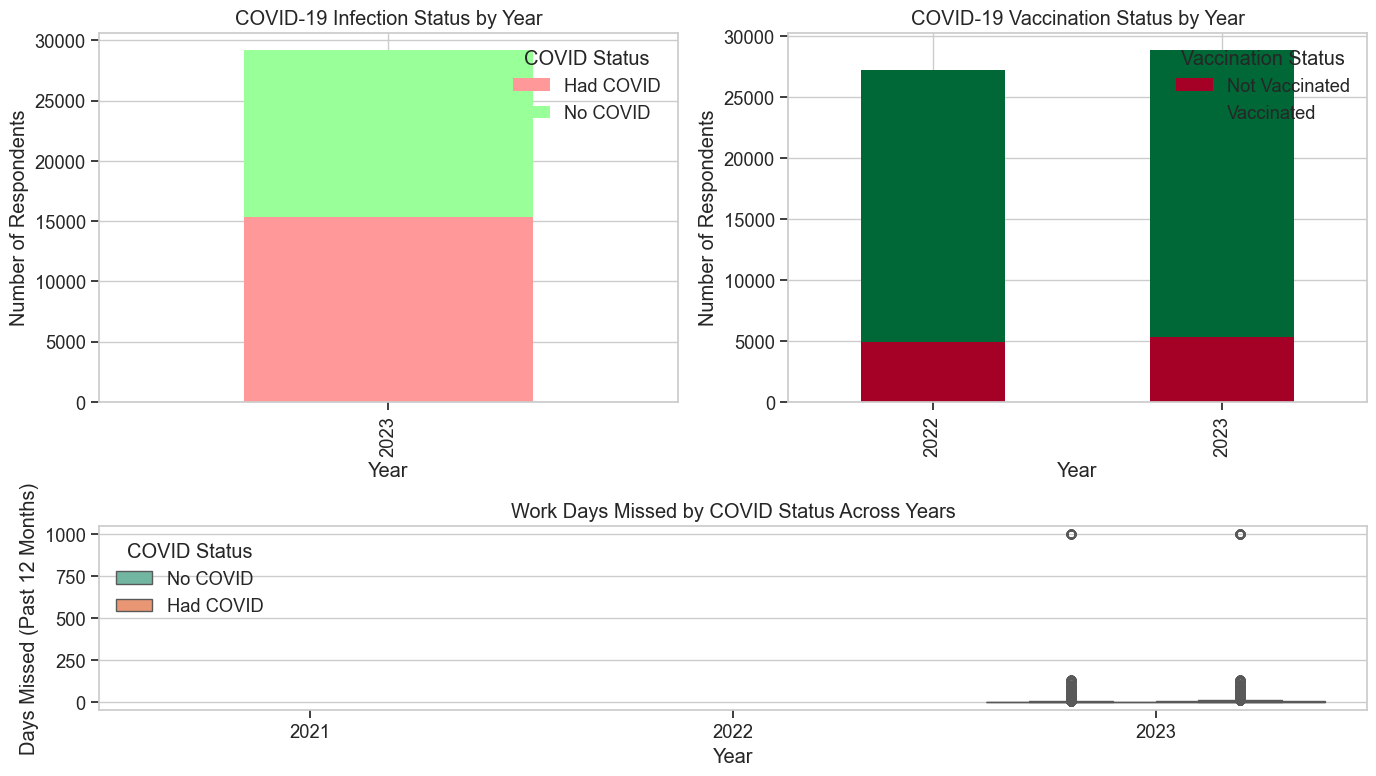

In [10]:
plot_covid_trends()

## Regional Analysis of Health Outcomes

In [11]:
# Define plot for regional data
def plot_regional_analysis():
    plt.figure(figsize=(14, 10))
    
    # Create subplots
    gs = gridspec.GridSpec(2, 2)
    
    # Top left: COVID rates by region and year
    ax1 = plt.subplot(gs[0, 0])
    region_covid = pd.crosstab(
        index=[viz_df['REGION'], viz_df['YEAR']], 
        columns=viz_df['EVERCOVD_A'], 
        normalize='index'
    )
    
    if 'Had COVID' in region_covid.columns:
        region_covid_rates = region_covid['Had COVID'].unstack()
        region_covid_rates.plot(kind='bar', ax=ax1)
        ax1.set_title('COVID-19 Rates by Region Over Time')
        ax1.set_ylabel('Proportion with COVID-19')
        ax1.set_xlabel('Region')
        ax1.legend(title='Year')
    
    # Top right: Vaccination rates by region and year
    ax2 = plt.subplot(gs[0, 1])
    region_vax = pd.crosstab(
        index=[viz_df['REGION'], viz_df['YEAR']], 
        columns=viz_df['SHTCVD191_A'], 
        normalize='index'
    )
    
    if 'Vaccinated' in region_vax.columns:
        region_vax_rates = region_vax['Vaccinated'].unstack()
        region_vax_rates.plot(kind='bar', ax=ax2)
        ax2.set_title('Vaccination Rates by Region Over Time')
        ax2.set_ylabel('Proportion Vaccinated')
        ax2.set_xlabel('Region')
        ax2.legend(title='Year')
    
    # Bottom left: Insurance coverage by region
    ax3 = plt.subplot(gs[1, 0])
    insurance_region = pd.crosstab(
        index=viz_df['REGION'],
        columns=viz_df['HICOV_A'],
        normalize='index'
    )
    insurance_region.plot(kind='bar', stacked=True, ax=ax3, colormap='Blues')
    ax3.set_title('Health Insurance Coverage by Region')
    ax3.set_ylabel('Proportion')
    ax3.set_xlabel('Region')
    ax3.legend(title='Insurance Status')
    
    # Bottom right: Days missed from work by region
    ax4 = plt.subplot(gs[1, 1])
    sns.boxplot(x='REGION', y='EMPDYSMSS3_A', data=viz_df, ax=ax4, palette='viridis')
    ax4.set_title('Work Days Missed by Region')
    ax4.set_ylabel('Days Missed (Past 12 Months)')
    ax4.set_xlabel('Region')
    
    plt.tight_layout()
    plt.savefig('regional_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

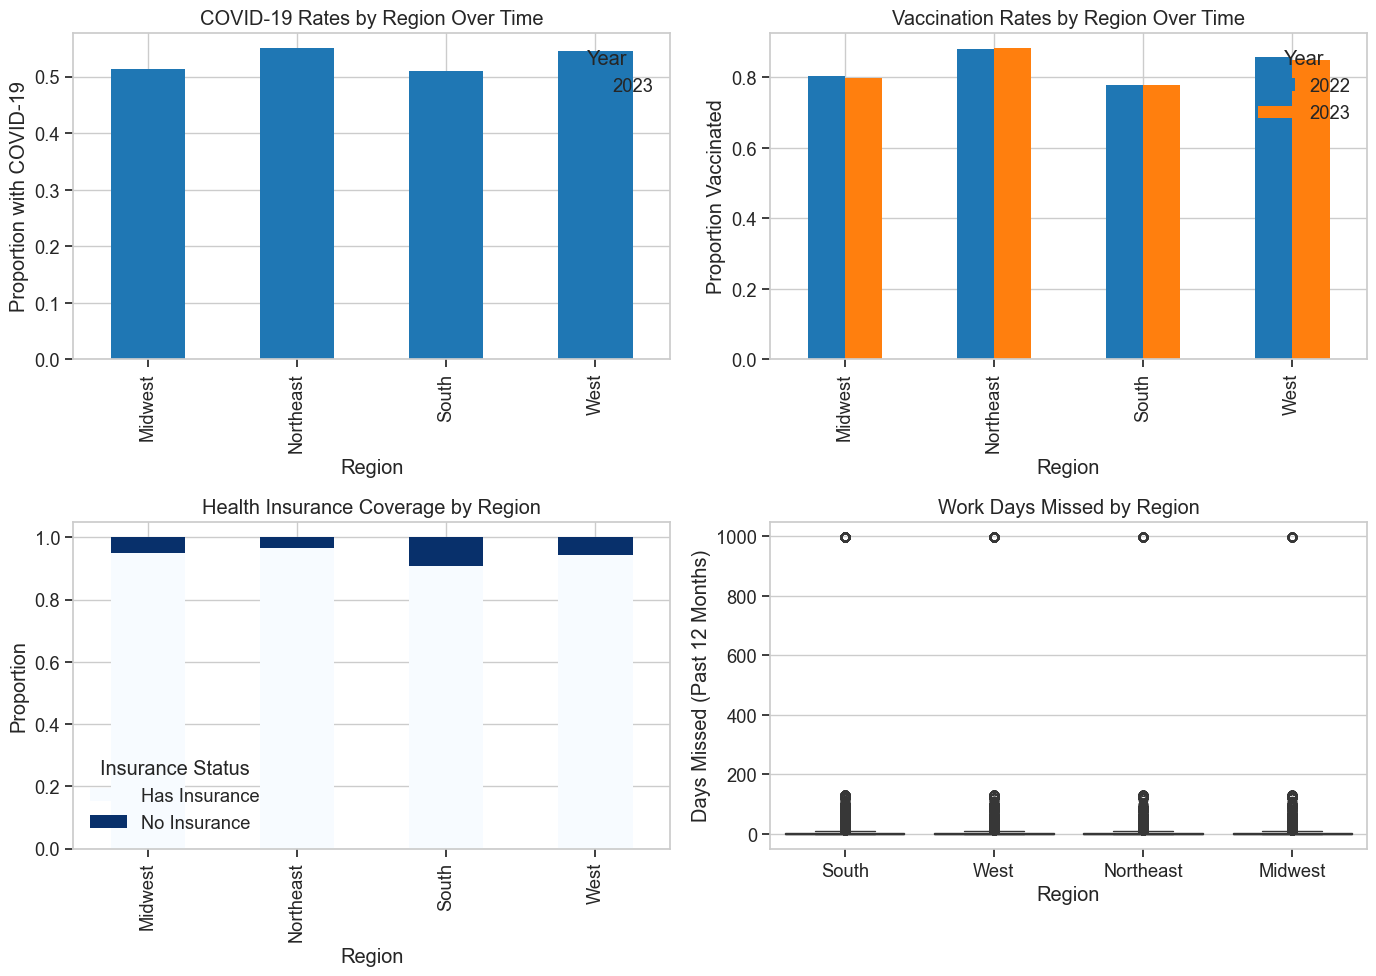

In [12]:
plot_regional_analysis()

## Demographic Analysis: Age, Gender, and Education

In [13]:
# Plot demographic data
def plot_demographic_analysis():
    plt.figure(figsize=(16, 12))
    
    # Create subplots
    gs = gridspec.GridSpec(3, 2)
    
    # Top left: Days missed by age group
    ax1 = plt.subplot(gs[0, 0])
    sns.boxplot(x='Age_Group', y='EMPDYSMSS3_A', data=viz_df, ax=ax1, palette='viridis')
    ax1.set_title('Work Days Missed by Age Group')
    ax1.set_ylabel('Days Missed (Past 12 Months)')
    ax1.set_xlabel('Age Group')
    
    # Top right: Days missed by gender
    ax2 = plt.subplot(gs[0, 1])
    sns.boxplot(x='SEX_A', y='EMPDYSMSS3_A', data=viz_df, ax=ax2, palette='Set1')
    ax2.set_title('Work Days Missed by Gender')
    ax2.set_ylabel('Days Missed (Past 12 Months)')
    ax2.set_xlabel('Gender')
    
    # Middle left: COVID status by age group
    ax3 = plt.subplot(gs[1, 0])
    covid_age = pd.crosstab(
        index=viz_df['Age_Group'],
        columns=viz_df['EVERCOVD_A'],
        normalize='index'
    )
    covid_age.plot(kind='bar', stacked=True, ax=ax3, colormap=health_cmap)
    ax3.set_title('COVID-19 Status by Age Group')
    ax3.set_ylabel('Proportion')
    ax3.set_xlabel('Age Group')
    ax3.legend(title='COVID Status')
    
    # Middle right: Vaccination status by education
    ax4 = plt.subplot(gs[1, 1])
    vax_edu = pd.crosstab(
        index=viz_df['Education'],
        columns=viz_df['SHTCVD191_A'],
        normalize='index'
    )
    vax_edu.plot(kind='bar', stacked=True, ax=ax4, colormap='RdYlGn')
    ax4.set_title('Vaccination Status by Education Level')
    ax4.set_ylabel('Proportion')
    ax4.set_xlabel('Education Level')
    ax4.legend(title='Vaccination Status')
    
    # Bottom left: Insurance coverage by education
    ax5 = plt.subplot(gs[2, 0])
    ins_edu = pd.crosstab(
        index=viz_df['Education'],
        columns=viz_df['HICOV_A'],
        normalize='index'
    )
    ins_edu.plot(kind='bar', stacked=True, ax=ax5, colormap='Blues')
    ax5.set_title('Health Insurance Coverage by Education Level')
    ax5.set_ylabel('Proportion')
    ax5.set_xlabel('Education Level')
    ax5.legend(title='Insurance Status')
    
    # Bottom right: Heat map of days missed across age and education
    ax6 = plt.subplot(gs[2, 1])
    missed_heatmap = viz_df.pivot_table(
        values='EMPDYSMSS3_A', 
        index='Education', 
        columns='Age_Group',
        aggfunc='mean'
    )
    sns.heatmap(missed_heatmap, cmap='YlOrRd', annot=True, fmt='.1f', ax=ax6)
    ax6.set_title('Average Work Days Missed by Age and Education')
    
    plt.tight_layout()
    plt.savefig('demographic_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

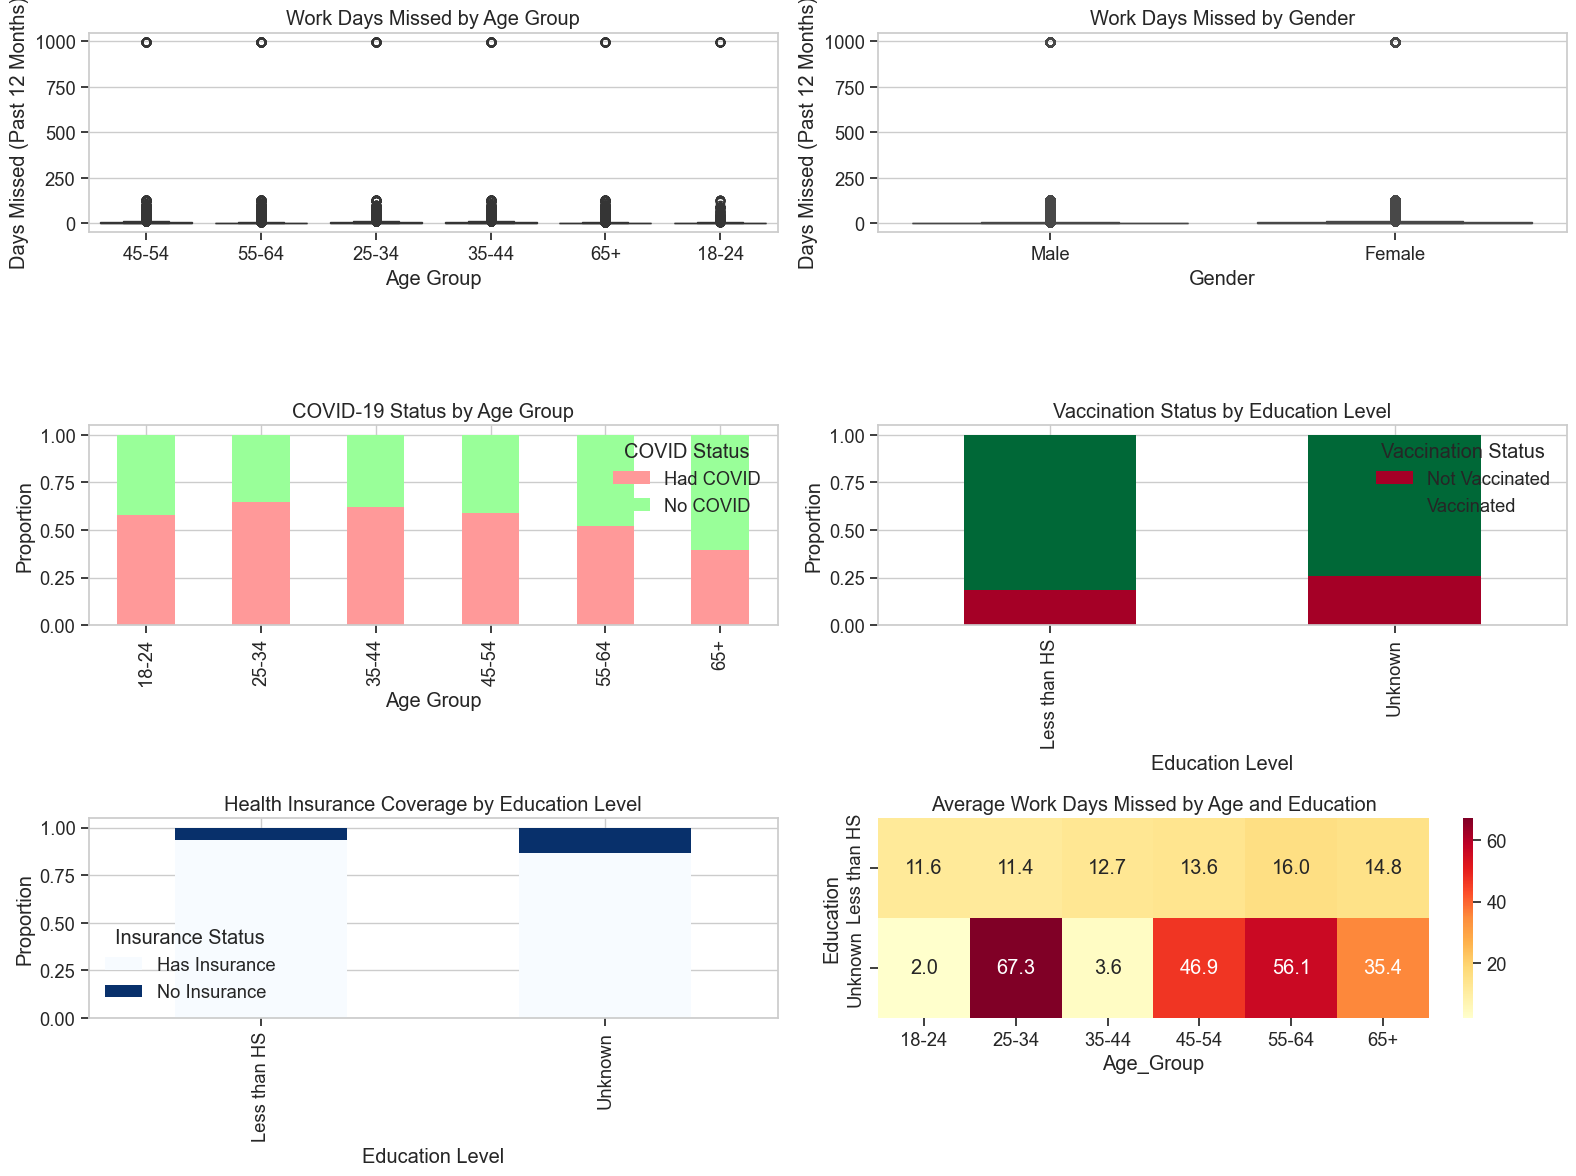

In [14]:
plot_demographic_analysis()

## Correlation Between COVID, Vaccination, and Work Days Missed

In [15]:
# Work impact visualization
def plot_covid_work_impact():
    plt.figure(figsize=(14, 10))
    
    # Create subplots
    gs = gridspec.GridSpec(2, 2)
    
    # Top left: Work days missed by COVID and vaccination status
    ax1 = plt.subplot(gs[0, 0])
    sns.boxplot(
        x='EVERCOVD_A', 
        y='EMPDYSMSS3_A', 
        hue='SHTCVD191_A', 
        data=viz_df,
        palette='Set2',
        ax=ax1
    )
    ax1.set_title('Work Days Missed by COVID and Vaccination Status')
    ax1.set_ylabel('Days Missed (Past 12 Months)')
    ax1.set_xlabel('COVID Status')
    ax1.legend(title='Vaccination Status')
    
    # Top right: Compare days missed across years for those with/without COVID
    ax2 = plt.subplot(gs[0, 1])
    year_covid_days = viz_df.groupby(['YEAR', 'EVERCOVD_A'])['EMPDYSMSS3_A'].mean().unstack()
    year_covid_days.plot(kind='bar', ax=ax2)
    ax2.set_title('Average Work Days Missed by Year and COVID Status')
    ax2.set_ylabel('Average Days Missed')
    ax2.set_xlabel('Year')
    ax2.legend(title='COVID Status')
    
    # Bottom left: Insurance impact on days missed for COVID patients
    ax3 = plt.subplot(gs[1, 0])
    sns.boxplot(
        x='HICOV_A', 
        y='EMPDYSMSS3_A', 
        hue='EVERCOVD_A', 
        data=viz_df,
        palette='Set1',
        ax=ax3
    )
    ax3.set_title('Insurance Impact on Work Days Missed')
    ax3.set_ylabel('Days Missed (Past 12 Months)')
    ax3.set_xlabel('Insurance Status')
    ax3.legend(title='COVID Status')
    
    # Bottom right: Industry analysis - top industries by days missed
    ax4 = plt.subplot(gs[1, 1])
    
    # Get top 10 industries by days missed
    industry_days = viz_df.groupby('EMDINDSTN1_A')['EMPDYSMSS3_A'].mean().sort_values(ascending=False).head(10)
    industry_days.plot(kind='bar', ax=ax4, color='teal')
    ax4.set_title('Top 10 Industries by Average Work Days Missed')
    ax4.set_ylabel('Average Days Missed')
    ax4.set_xlabel('Industry Code')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('covid_work_impact.png', dpi=300, bbox_inches='tight')
    plt.show()

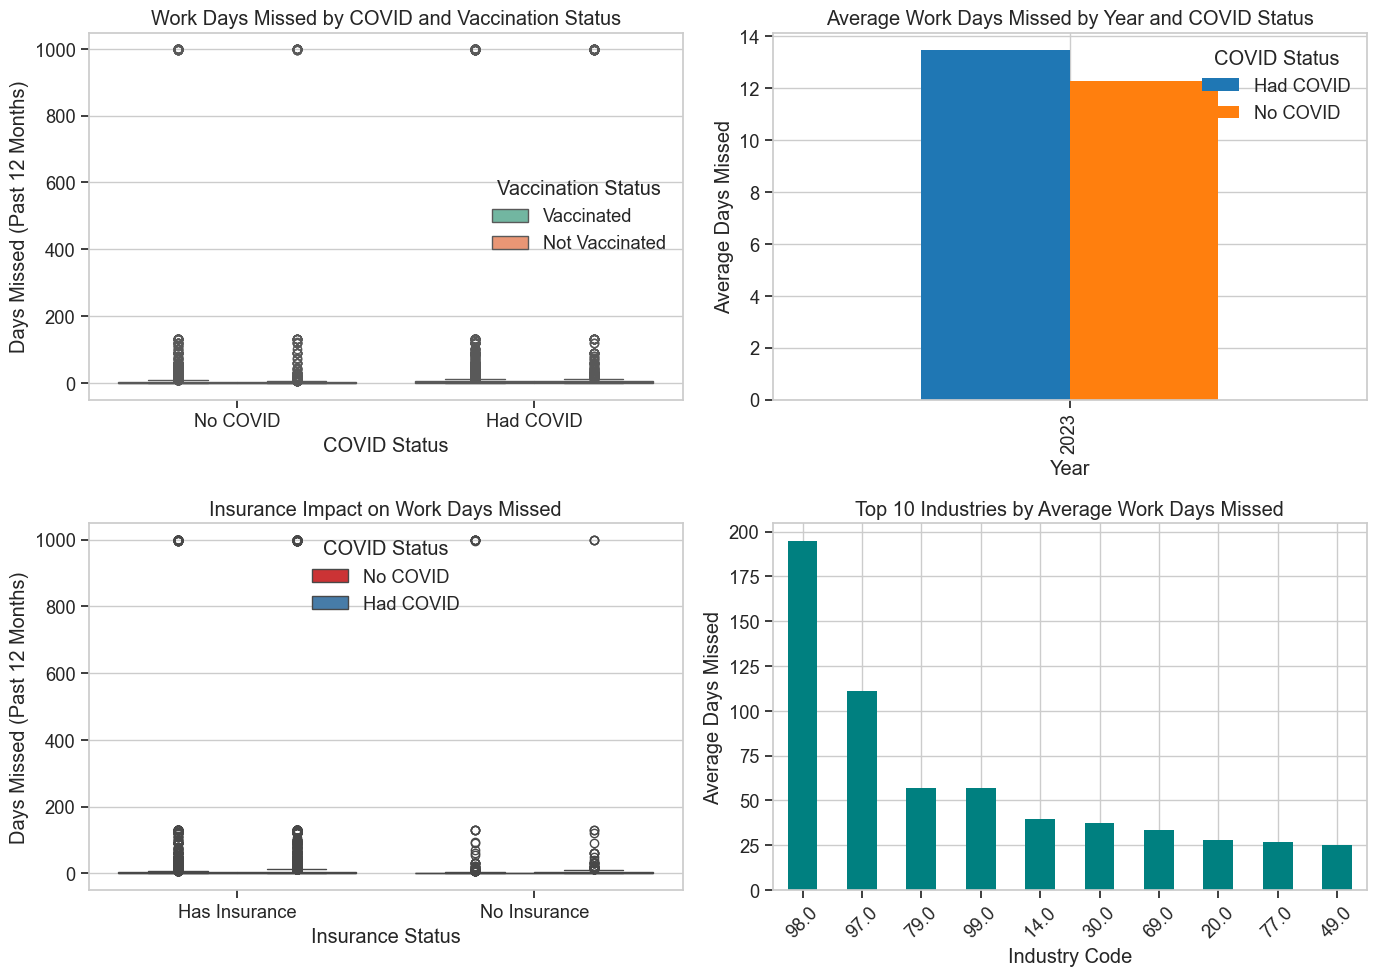

In [16]:
plot_covid_work_impact()

## Multivariate Analysis Dashboard

In [17]:
# Dashboard
def plot_multivariate_dashboard():
    plt.figure(figsize=(16, 14))
    
    # Create subplots
    gs = gridspec.GridSpec(3, 3)
    
    # Top left: COVID rates over time
    ax1 = plt.subplot(gs[0, 0])
    covid_time = viz_df.groupby('YEAR')['EVERCOVD_A'].apply(
        lambda x: (x == 'Had COVID').mean()
    )
    covid_time.plot(kind='line', marker='o', ax=ax1, color='crimson', linewidth=3)
    ax1.set_title('COVID-19 Rates Over Time')
    ax1.set_ylabel('Proportion with COVID-19')
    ax1.set_xlabel('Year')
    
    # Top middle: Vaccination rates over time
    ax2 = plt.subplot(gs[0, 1])
    vax_time = viz_df.groupby('YEAR')['SHTCVD191_A'].apply(
        lambda x: (x == 'Vaccinated').mean()
    )
    vax_time.plot(kind='line', marker='o', ax=ax2, color='forestgreen', linewidth=3)
    ax2.set_title('Vaccination Rates Over Time')
    ax2.set_ylabel('Proportion Vaccinated')
    ax2.set_xlabel('Year')
    
    # Top right: Average days missed over time
    ax3 = plt.subplot(gs[0, 2])
    days_time = viz_df.groupby('YEAR')['EMPDYSMSS3_A'].mean()
    days_time.plot(kind='line', marker='o', ax=ax3, color='navy', linewidth=3)
    ax3.set_title('Average Work Days Missed Over Time')
    ax3.set_ylabel('Average Days Missed')
    ax3.set_xlabel('Year')
    
    # Middle left: COVID rates by region (heatmap)
    ax4 = plt.subplot(gs[1, 0])
    covid_region_year = viz_df.pivot_table(
        values='EVERCOVD_A',
        index='REGION',
        columns='YEAR',
        aggfunc=lambda x: (x == 'Had COVID').mean()
    )
    sns.heatmap(covid_region_year, cmap='Reds', annot=True, fmt='.2f', ax=ax4)
    ax4.set_title('COVID-19 Rates by Region and Year')
    
    # Middle: Vaccination rates by region (heatmap)
    ax5 = plt.subplot(gs[1, 1])
    vax_region_year = viz_df.pivot_table(
        values='SHTCVD191_A',
        index='REGION',
        columns='YEAR',
        aggfunc=lambda x: (x == 'Vaccinated').mean()
    )
    sns.heatmap(vax_region_year, cmap='Greens', annot=True, fmt='.2f', ax=ax5)
    ax5.set_title('Vaccination Rates by Region and Year')
    
    # Middle right: Insurance coverage by region (heatmap)
    ax6 = plt.subplot(gs[1, 2])
    ins_region_year = viz_df.pivot_table(
        values='HICOV_A',
        index='REGION',
        columns='YEAR',
        aggfunc=lambda x: (x == 'Has Insurance').mean()
    )
    sns.heatmap(ins_region_year, cmap='Blues', annot=True, fmt='.2f', ax=ax6)
    ax6.set_title('Insurance Coverage by Region and Year')
    
    # Bottom left: Days missed distribution
    ax7 = plt.subplot(gs[2, 0])
    sns.histplot(viz_df['EMPDYSMSS3_A'].dropna(), kde=True, ax=ax7, color='purple')
    ax7.set_title('Distribution of Work Days Missed')
    ax7.set_xlabel('Days Missed (Past 12 Months)')
    ax7.set_ylabel('Frequency')
    
    # Bottom middle: Correlation between age and days missed
    ax8 = plt.subplot(gs[2, 1])
    sns.regplot(x='AGEP_A', y='EMPDYSMSS3_A', data=viz_df, ax=ax8, scatter_kws={'alpha':0.3})
    ax8.set_title('Correlation: Age vs. Work Days Missed')
    ax8.set_xlabel('Age')
    ax8.set_ylabel('Days Missed (Past 12 Months)')
    
    # Bottom right: Key findings summary text
    ax9 = plt.subplot(gs[2, 2])
    ax9.axis('off')
    
    # Calculate key statistics for summary
    avg_days = viz_df['EMPDYSMSS3_A'].mean()
    covid_impact = viz_df.groupby('EVERCOVD_A')['EMPDYSMSS3_A'].mean()
    vax_impact = viz_df.groupby('SHTCVD191_A')['EMPDYSMSS3_A'].mean()
    
    # Create summary text
    summary_text = (
        "Key Findings:\n\n"
        f"• Average work days missed: {avg_days:.1f} days\n\n"
        "• COVID Impact on Work Absences:\n"
    )
    
    if 'Had COVID' in covid_impact and 'No COVID' in covid_impact:
        diff = covid_impact['Had COVID'] - covid_impact['No COVID']
        summary_text += f"  - Those with COVID missed {diff:.1f} more days\n\n"
    
    if 'Vaccinated' in vax_impact and 'Not Vaccinated' in vax_impact:
        vax_diff = vax_impact['Not Vaccinated'] - vax_impact['Vaccinated']
        if vax_diff > 0:
            summary_text += f"• Vaccination reduced absences by {vax_diff:.1f} days\n\n"
        else:
            summary_text += f"• Vaccination impact on absences: {-vax_diff:.1f} days\n\n"
    
    # Add regional insight
    region_days = viz_df.groupby('REGION')['EMPDYSMSS3_A'].mean()
    highest_region = region_days.idxmax()
    lowest_region = region_days.idxmin()
    summary_text += (
        f"• Regional patterns:\n"
        f"  - Highest absences: {highest_region}\n"
        f"  - Lowest absences: {lowest_region}\n\n"
    )
    
    # Add year-over-year trend
    if len(viz_df['YEAR'].unique()) > 1:
        year_trend = viz_df.groupby('YEAR')['EMPDYSMSS3_A'].mean().pct_change().mean() * 100
        trend_dir = "increased" if year_trend > 0 else "decreased"
        summary_text += f"• Work absences have {trend_dir} by {abs(year_trend):.1f}% year-over-year"
    
    ax9.text(0, 1, summary_text, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.savefig('multivariate_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

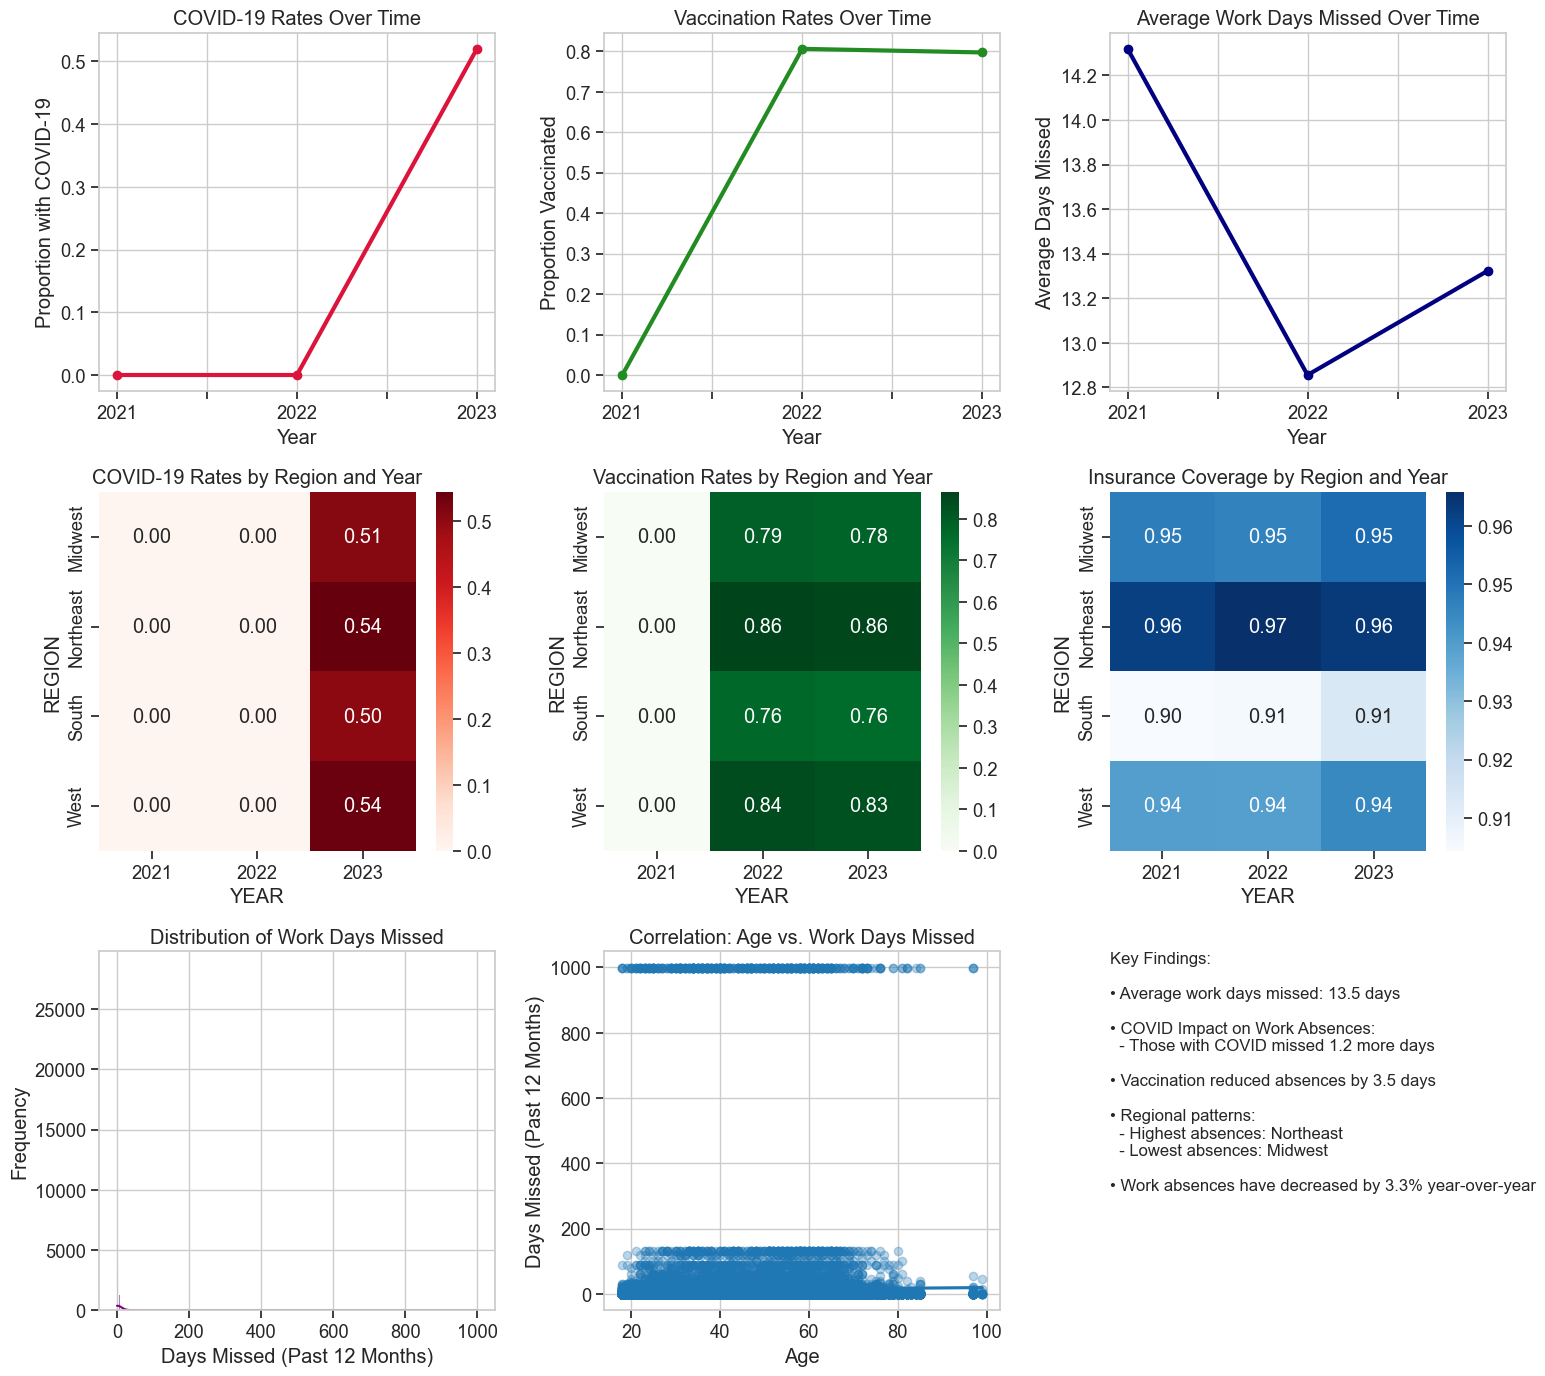

In [18]:
plot_multivariate_dashboard()

In [19]:
def generate_policy_recommendations():
    # Calculate key metrics for recommendations
    
    # 1. Calculate days missed by COVID and vaccination status
    days_by_covid_vax = viz_df.pivot_table(
        values='EMPDYSMSS3_A',
        index='EVERCOVD_A',
        columns='SHTCVD191_A',
        aggfunc='mean'
    )
    
    # 2. Calculate days missed by insurance status
    days_by_insurance = viz_df.groupby('HICOV_A')['EMPDYSMSS3_A'].mean()
    
    # 3. Calculate days missed by age group
    days_by_age = viz_df.groupby('Age_Group')['EMPDYSMSS3_A'].mean()
    
    # 4. Calculate days missed by region
    days_by_region = viz_df.groupby('REGION')['EMPDYSMSS3_A'].mean()
    
    # 5. Calculate days missed by industry
    days_by_industry = viz_df.groupby('EMDINDSTN1_A')['EMPDYSMSS3_A'].mean().nlargest(5)
    
    # Create a figure for policy recommendations
    plt.figure(figsize=(12, 10))
    plt.text(0.5, 0.98, 'Policy Recommendations Based on NHIS Data Analysis',
             horizontalalignment='center', fontsize=18, fontweight='bold')
    
    recommendations = [
        "1. Vaccination Incentive Program:\n   Based on the " + 
        f"difference of {abs(days_by_covid_vax.loc['Had COVID', 'Vaccinated'] - days_by_covid_vax.loc['Had COVID', 'Not Vaccinated']):.1f} " +
        "fewer missed workdays for vaccinated employees who had COVID.",
        
        "2. Targeted Support for High-Risk Departments:\n   Industries with codes " +
        f"{', '.join(days_by_industry.index.astype(str))} show significantly higher absence rates " +
        "and should receive enhanced health support.",
        
        "3. Regional Health Policy Customization:\n   " +
        f"The {days_by_region.idxmax()} region shows {days_by_region.max():.1f} average missed days vs. " +
        f"{days_by_region.min():.1f} in {days_by_region.idxmin()}, suggesting regional policy tailoring.",
        
        "4. Age-Appropriate Wellness Programs:\n   " +
        f"The {days_by_age.idxmax()} age group misses {days_by_age.max():.1f} days on average, " +
        "indicating a need for targeted wellness programs.",
        
        "5. Enhanced Health Insurance Coverage:\n   " +
        "Employees with health insurance miss " +
        f"{abs(days_by_insurance.iloc[0] - days_by_insurance.iloc[1]):.1f} fewer days annually, " +
        "suggesting potential ROI for improved coverage."
    ]
    
    y_position = 0.9
    for rec in recommendations:
        plt.text(0.05, y_position, rec, fontsize=12, wrap=True)
        y_position -= 0.15
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('policy_recommendations.png', dpi=300, bbox_inches='tight')
    plt.show()

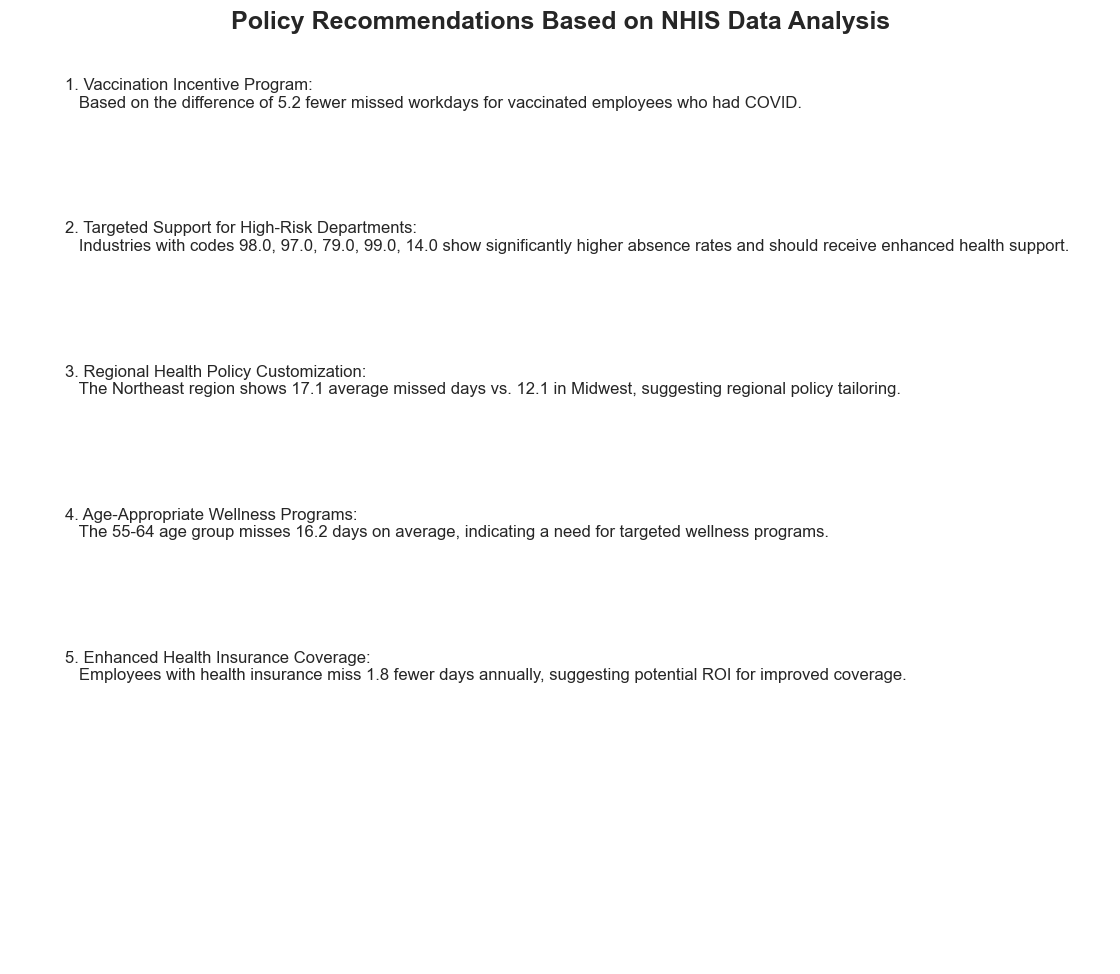

In [20]:
# Generate policy recommendations
generate_policy_recommendations()

## References

CDC (2024). 2023 NHIS questionnaires, datasets, and documentation. National Center for Health Statistics. https://www.cdc.gov/nchs/nhis/documentation/2023-nhis.html

OpenAI. (2024). ChatGPT (March 6 version) [Large language model]. https://openai.com/chatgpt